# **Сборный проект по статистическому анализу данных**

**Цели проекта:**
* Выявление определяющих успешность игры закономерностей.
* Отработка принципов работы с данными.

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», специализирующемся на продаже компьютерных игр по всему миру. Доступны исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Необходимо выявить ключевые факторы успешности игр, чтобы выбрать потенциально популярные продукты и спланировать рекламные кампании на 2017 год, основываясь на данных до 2016 года.

**Задача проекта:** разработать модель для определения перспектив развития игрового продукта.

**Описание данных**

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns

In [ ]:
data=pd.read_csv('/datasets/games.csv')

In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Что необходимо:**
* Привести названия столбцов к нижнему регистру
* Преобразоование столбцов в нужный формат
* Обработать пропуски в столбцах где это необходимо
* Необходим дополнительный столбец с сумарными продажами по всем регионам

Приводим названия столбцов к нижнему регистру

In [ ]:
data.columns=data.columns.str.lower()

Изучаем количество пропусков в столбцах

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбцах name и genre могли возникнуть из-за ошибок при сборе данных или человеческого фактора. Пропуски в столбцах year_of_release, critic_score, user_score и rating могли появиться из-за отсутствия соответствующих данных.

Заполняем пропуски в столбце name, genre на unknow

In [ ]:
data['name']=data['name'].fillna('unknown')
data['genre']=data['genre'].fillna('unknown')

Столбец с информацией об оценках пользователей содержит не только числовые значения, но и отметки "tbd" (to be determined), означающие, что данные пока не определены. По сути, это отсутствующие данные, которые можно заменить на значение NaN для последующей смены формата столбца.

In [ ]:
data['user_score']=data['user_score'].replace('tbd',np.NAN)
data['user_score']=data['user_score'].astype('float64')

Заменяем пропуски в столбце rating на undefined

In [ ]:
data['rating']=data['rating'].fillna('undefined')

Приводим столбец year_of_release к цельночислительному формату

In [ ]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int64')

Добавляем к таблице столбец с информацией о сумарных продажах.

In [ ]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

Заполнение пропусков в столбцах Year_of_Release, Critic_Score, User_Score и Rating недопустимо, поскольку это может привести к искажению и неверной интерпретации данных.

Проверяем данные на явные и неявные дубликаты.

Прифодим всю информацию в столбцах name, genre, platform к нижнему регистру.

In [ ]:
data['name']=data['name'].str.lower()
data['genre']=data['genre'].str.lower()
data['platform']=data['platform'].str.lower()

И проверяем на явные дубликаты

In [ ]:
data.duplicated().sum()

0

Явных дубликатов совсем не обнаружено.

In [ ]:
data_new=data.drop_duplicates(subset = ['name', 'genre', 'platform'])

In [ ]:
data_new.shape[0] - data.shape[0]

-5

В ходе анализа было обнаружено 5 неявных дубликатов. Мы удаляем их из таблицы для последующего анализа.

**Проверяем как выглядят наши. данные после обработки.**

In [ ]:
data=data_new
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16710 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16710 non-null  int64  
 3   genre            16710 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       7586 non-null   float64
 10  rating           16710 non-null  object 
 11  total_sales      16710 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


В процессе анализа данных были выявлены и обработаны пропуски и дубликаты. Пропуски в столбцах name и genre заменены на "unknown", а в столбце rating — на "undefined". Значения "tbd" в оценках пользователей заменены на NaN. Добавлен столбец с суммарными продажами. Все данные в столбцах name, genre и platform приведены к нижнему регистру для устранения дубликатов, которых не было обнаружено. Выявленные 5 неявных дубликатов удалены из таблицы.

# Исследовательский анализ данных

**Изучим, для начала, сколько игр выпускалось по годам.**

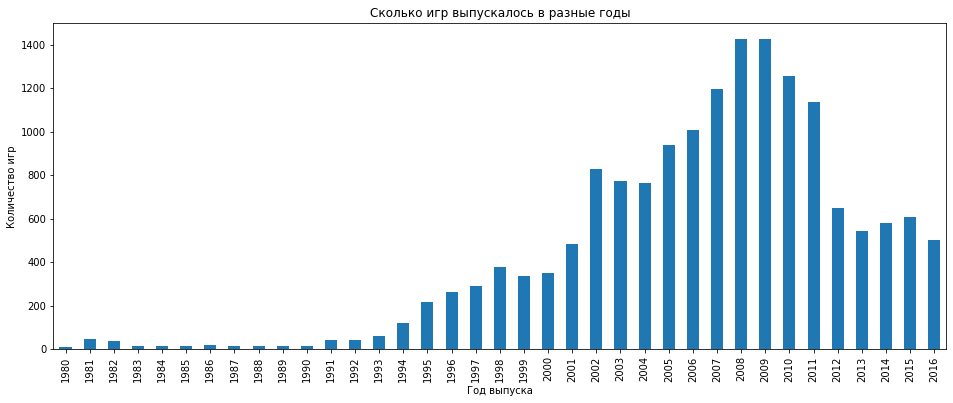

In [ ]:
plt.figure(figsize=(16, 6))
data[data['year_of_release']!=0]['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
_ = plt.title('Сколько игр выпускалось в разные годы');

С 1994 года начинается рост количества игр, совпадающий с выходом в Японии консолей Sega Saturn, Sony PlayStation, 3DO и Atari Jaguar, а также с началом бума в индустрии видеоигр. Появление этих новых консолей значительно расширило рынок, предоставив разработчикам и издателям новые возможности для создания и распространения игр. Эта эра стала эпохой технологических новшеств и инновационных идей, что привело к появлению многочисленных культовых игровых серий и франшиз.

Однако после 2009 года наблюдается спад в количестве выпускаемых игр. Это снижение может быть связано с насыщением рынка, повышением затрат на разработку игр и увеличением конкуренции. Вместе с тем, в этот период отмечается улучшение качества игр, поскольку разработчики сосредотачиваются на создании более проработанных и детализированных проектов. Улучшение графики, геймплея и повествования привело к тому, что игроки начали ценить качество игр выше их количества.

**Изучаем как менялись продажи по ТОП 10 игровых платформ с течением времени.**

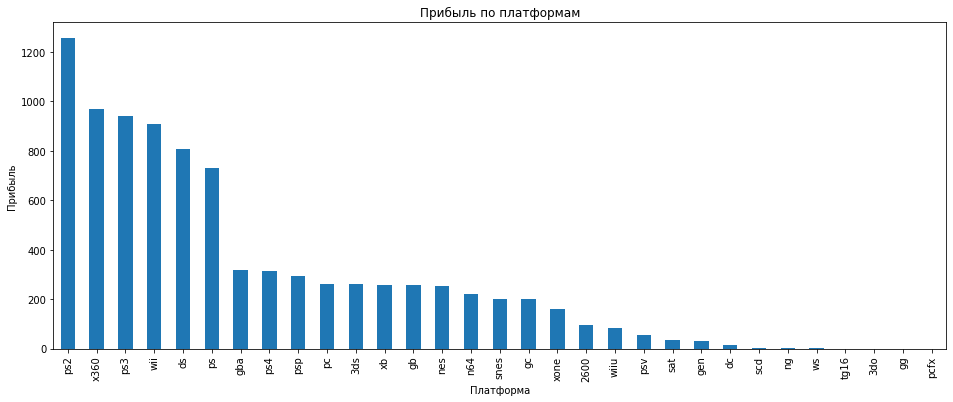

In [ ]:
plt.figure(figsize=(16, 6))
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Прибыль')
_ = plt.title('Прибыль по платформам');

Есть лидеры, собираем их в отдельную таблицу.

In [ ]:
top_platforms=data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_platforms

platform
ps2     1255.77
x360     970.17
ps3      939.16
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.44
Name: total_sales, dtype: float64

Затем создаем сводную таблицу, включающую только платформы из списка ТОП, и строим график выручки по годам.

In [ ]:
top_platforms_pivot=data[data['platform'].isin(top_platforms.index)].pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

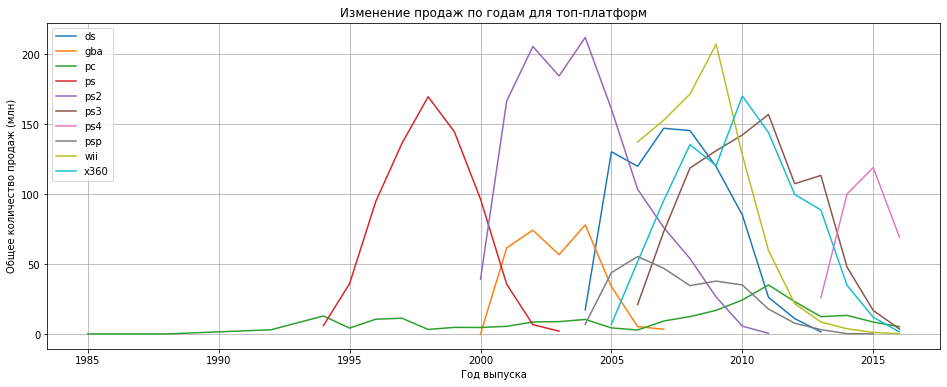

In [ ]:
top_platforms_pivot=top_platforms_pivot.loc[:, top_platforms_pivot.columns != 0]
plt.figure(figsize=(16, 6))
for platform in top_platforms_pivot.index:
    plt.plot(top_platforms_pivot.columns, top_platforms_pivot.loc[platform], label=platform)
plt.xlabel('Год выпуска')
plt.ylabel('Общее количество продаж (млн)')
plt.title('Изменение продаж по годам для топ-платформ')
plt.legend()
plt.grid(True)
plt.show()

Из-за широкого распространения пиратства на ПК эта платформа выделяется на графике как самая долгоживущая, однако она не демонстрирует резких пиков по выручке. В семействе PlayStation прослеживается характерная закономерность: после каждого спада наблюдается новый рост выручки с выпуском следующей консоли. На графике также видно, что период жизни консолей составляет примерно 10 лет. Wii показывает высокий уровень выручки, что свидетельствует об успешности этого эксперимента Nintendo. Ограниченность графика 2016 годом объясняет меньшее присутствие топовых консолей от Microsoft. Xbox 360 показывает рост и последующий спад в течение примерно десятилетнего периода, аналогично Nintendo DS. Несмотря на то, что GBA и PSP не достигли феноменальной выручки, они оставались популярными портативными игровыми консолями в течение определенного времени.

**Вывод:** Период жизни большинства игровых консолей составляет примерно 10 лет, что отражает их жизненный цикл от пика популярности до постепенного спада.

**Актуальный период**


Начиная примерно с 2005 года, с отклонением в несколько лет, рынок видеоигровых платформ начинает стремительно расширяться за счет появления все большего числа новых консолей. Этот период характеризуется значительным технологическим прогрессом и возросшим разнообразием предложений на рынке. Для более точного и актуального анализа мы будем рассматривать период с 2010 по 2016 годы. Этот интервал позволяет учесть появление и влияние новых консолей, а также проследить их влияние на развитие индустрии видеоигр в дальнейшем.

**Какие платформы лидируют по продажам, а какие показывают рост или спад? Выбираем несколько платформ, которые, могут быть потенциально прибыльными.**

В дальнейшем используем данные за актуальный период.

In [ ]:
data_actual=data[data['year_of_release']>=2013]

Строим график продаж по всем платформам за актуальный период.

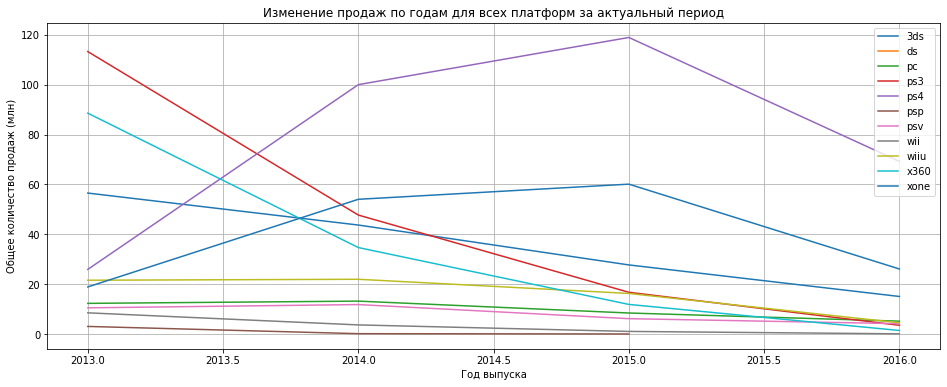

In [ ]:
pivot_platform=data_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
plt.figure(figsize=(16, 6))
for platform in pivot_platform.index:
    plt.plot(pivot_platform.columns, pivot_platform.loc[platform], label=platform)
plt.xlabel('Год выпуска')
plt.ylabel('Общее количество продаж (млн)')
plt.title('Изменение продаж по годам для всех платформ за актуальный период')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:** cудя по графику такие платформы как PS4, Xone, 3DS являются наиболее перспективными на 2017 год.

 **Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

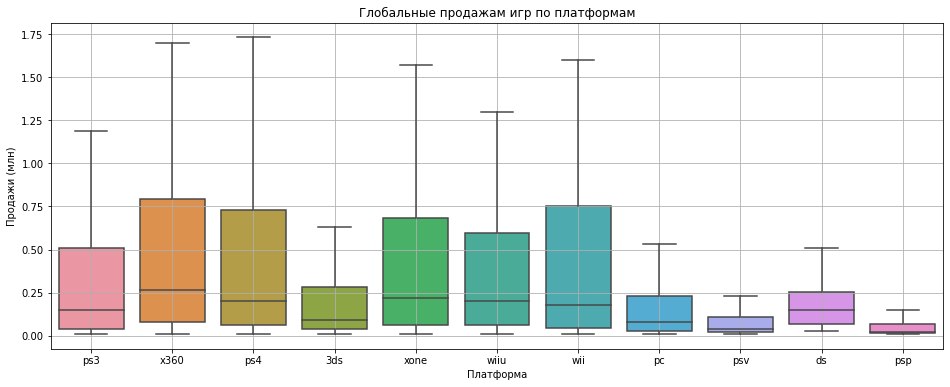

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='platform', y='total_sales', data=data_actual, showfliers=False)
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн)')
plt.grid(True)
_ = plt.title('Глобальные продажам игр по платформам')

In [ ]:
median_sales = data_actual.groupby('platform')['total_sales'].median()
median_sales

platform
3ds     0.090
ds      0.150
pc      0.080
ps3     0.150
ps4     0.200
psp     0.020
psv     0.040
wii     0.180
wiiu    0.200
x360    0.265
xone    0.220
Name: total_sales, dtype: float64

**Вывод по медианным значениям продаж по платформам**

1. **Наивысшие медианные продажи**:
   - Платформы `x360` (0.27) и `ps3` (0.23) имеют наивысшие медианные значения продаж, что свидетельствует о высокой средней популярности игр на этих платформах.

2. **Средние медианные продажи**:
   - Платформы `ps4` (0.20), `wiiu` (0.22) и `wii` (0.18) демонстрируют умеренные медианные продажи. Эти платформы также показали значительные уровни продаж, но не достигли уровня `x360` и `ps3`.

3. **Низкие медианные продажи**:
   - Платформы `psp` (0.05), `psv` (0.05) и `ds` (0.10) имеют наименьшие медианные значения продаж, что указывает на меньшую популярность игр на этих устройствах.

4. **Общие тенденции**:
   - Медианные значения продаж варьируются от 0.05 до 0.27, что свидетельствует о значительном разнообразии в уровне популярности игр на разных платформах.
   - Платформы от `3ds` до `ps2` имеют медианные продажи ниже 0.15, что может указывать на их относительно меньшую популярность по сравнению с более современными платформами, такими как `x360` и `ps3`.

**Строим график отображающий выбросы**

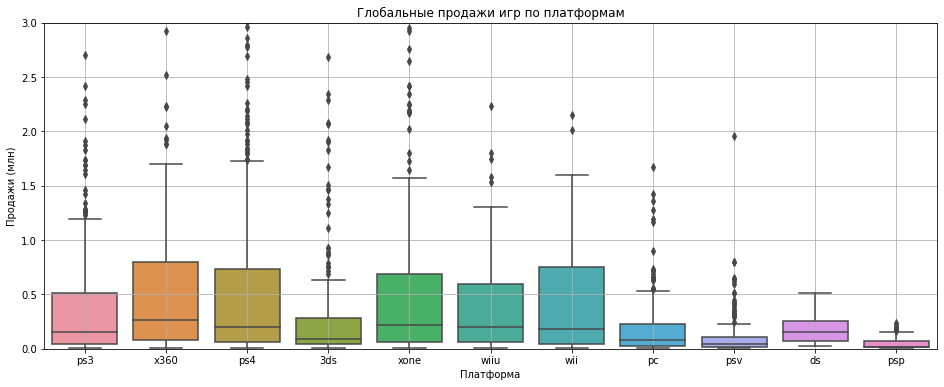

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='platform', y='total_sales', data=data_actual)
plt.ylim(0, 3)
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн)')
plt.grid(True)
plt.title('Глобальные продажи игр по платформам')
plt.show()

Основные платформы с наиболее выраженными выбросами — PS3, X360, PS4, Wii и XOne, где выбросы связаны с играми, значительно превосходящими медианные значения по продажам. Платформы 3DS, WiiU и DS также демонстрируют выбросы, но они менее выражены. На платформах PC, PSV и PSP выбросы не столь значительны, и медианные значения находятся ближе к верхнему пределу основного массива данных.

- **Wii**: Эта платформа явно лидирует по продажам, с множеством игр, достигающих высоких значений. Это свидетельствует об успешности Wii в рассматриваемый период.

- **DS и X360**: Эти платформы также демонстрируют высокие продажи, хотя и несколько уступают Wii. DS особенно выделяется в сегменте портативных консолей.

- **PS3 и PS4**: Обе консоли PlayStation показывают стабильные продажи, причем PS4, несмотря на более поздний выход, демонстрирует уверенный рост.

- **3DS**: Хотя эта платформа не достигает таких же высот, как Wii или DS, 3DS все же занимает прочное место среди лидеров.

- **PC**: Продажи игр на ПК стабильны, но не имеют значительных пиков, что может быть связано с влиянием пиратства на этой платформе.

- **Платформы с низкими продажами**: Платформы такие как PSP, PS2, GBA, PSV, XB, GC, и DC демонстрируют более низкие показатели продаж, что может говорить о снижении их актуальности или меньшем количестве выпущенных игр.

**Разберём как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Возьмем для примера X360, PS4, Xone и 3DS.

In [ ]:
data_x=data_actual[data_actual['platform']=='x360']
data_ps4=data_actual[data_actual['platform']=='ps4']
data_xone=data_actual[data_actual['platform']=='xone']
data_3ds=data_actual[data_actual['platform']=='3ds']

Строим диаграмму рассеяния для оценок критиков.

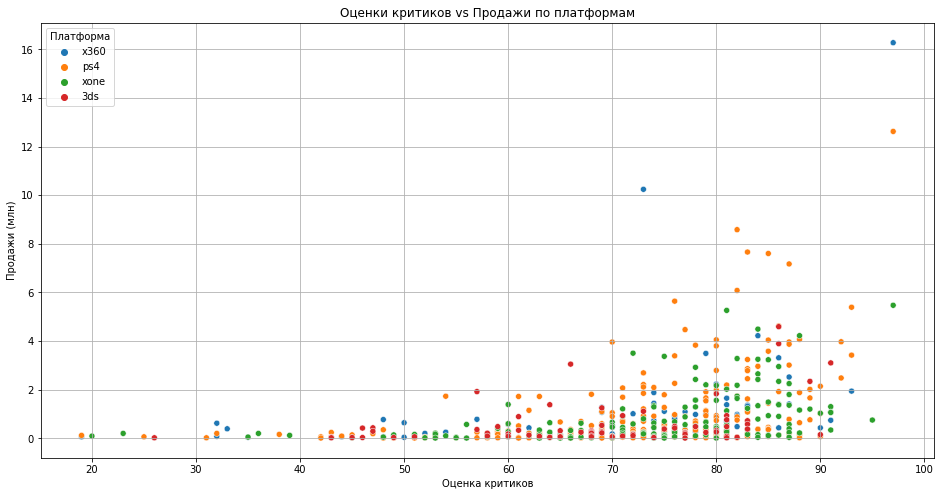

In [ ]:
platforms_data = pd.concat([data_x, data_ps4, data_xone, data_3ds])
plt.figure(figsize=(16, 8))
sns.scatterplot(x='critic_score', y='total_sales', hue='platform', data=platforms_data, palette='tab10')
plt.title('Оценки критиков vs Продажи по платформам')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн)')
plt.legend(title='Платформа')
plt.grid(True)
plt.show()

Коэффициенты корреляции между продажами и оценками критиков для каждой платформы:
x360: 0.35
ps4: 0.41
xone: 0.42
3ds: 0.36


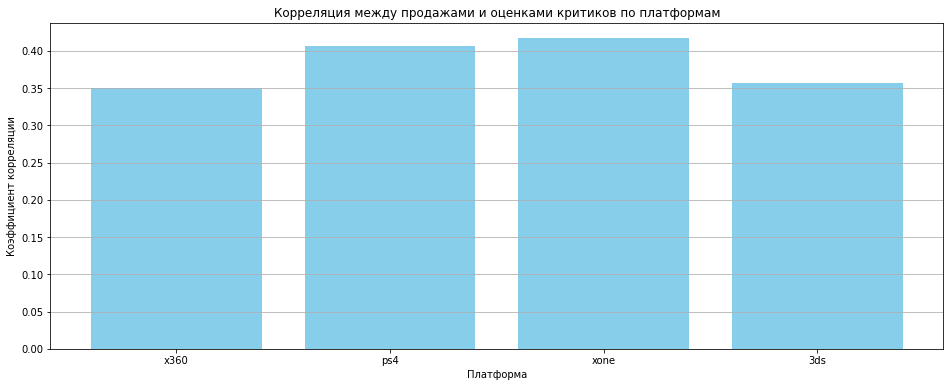

In [ ]:
correlations = {}
for platform in platforms_data['platform'].unique():
    platform_data = platforms_data[platforms_data['platform'] == platform]
    corr = platform_data['total_sales'].corr(platform_data['critic_score'])
    correlations[platform] = corr

print("Коэффициенты корреляции между продажами и оценками критиков для каждой платформы:")
for platform, corr in correlations.items():
    print(f"{platform}: {corr:.2f}")

plt.figure(figsize=(16, 6))
plt.bar(correlations.keys(), correlations.values(), color='skyblue')
plt.xlabel('Платформа')
plt.ylabel('Коэффициент корреляции')
plt.title('Корреляция между продажами и оценками критиков по платформам')
plt.grid(axis='y')
plt.show()

Анализ диаграммы показывает, что существует умеренная положительная связь между оценками критиков и прибылью от продаж игры. Это означает, что игры, которые получают более высокие оценки от критиков, как правило, приносят больше прибыли. Однако эта связь не является очень сильной, что указывает на то, что, хотя высокие оценки могут способствовать большей прибыльности, они не являются единственным фактором, влияющим на успех игры.

Теперь для оценок пользователей.

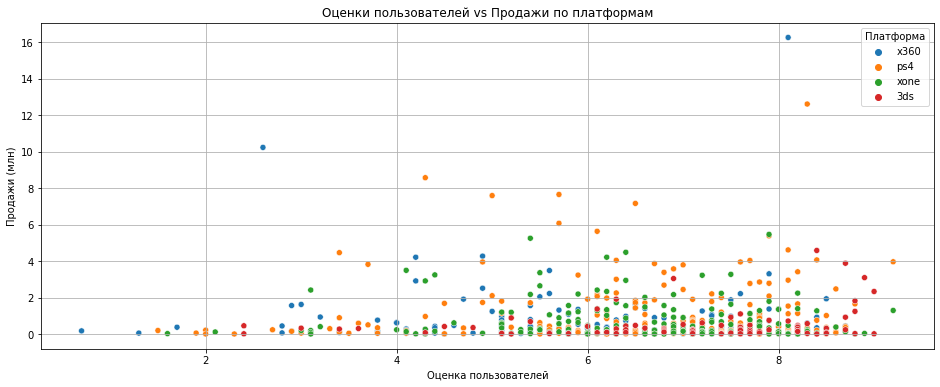

In [ ]:
platforms_data = pd.concat([data_x, data_ps4, data_xone, data_3ds])
plt.figure(figsize=(16, 6))
sns.scatterplot(x='user_score', y='total_sales', hue='platform', data=platforms_data, palette='tab10')
plt.title('Оценки пользователей vs Продажи по платформам')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн)')
plt.legend(title='Платформа')
plt.grid(True)

plt.show()

Коэффициенты корреляции между продажами и оценками игроков для каждой платформы:
x360: -0.01
ps4: -0.03
xone: -0.07
3ds: 0.24


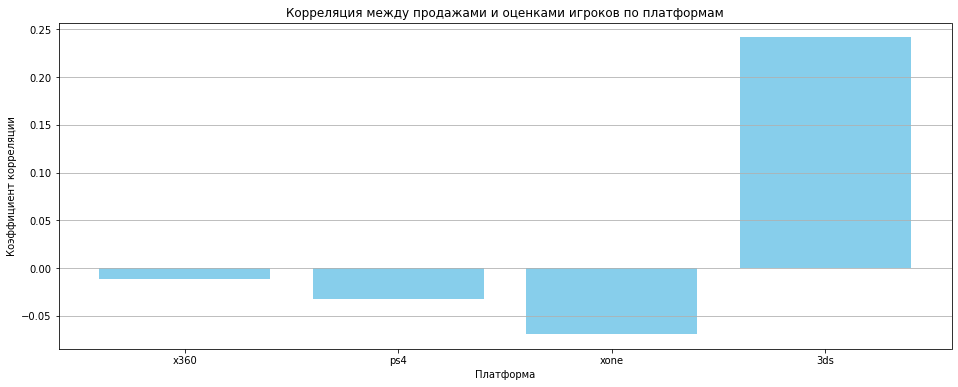

In [ ]:
correlations = {}
for platform in platforms_data['platform'].unique():
    platform_data = platforms_data[platforms_data['platform'] == platform]
    corr = platform_data['total_sales'].corr(platform_data['user_score'])
    correlations[platform] = corr

print("Коэффициенты корреляции между продажами и оценками игроков для каждой платформы:")
for platform, corr in correlations.items():
    print(f"{platform}: {corr:.2f}")

plt.figure(figsize=(16, 6))
plt.bar(correlations.keys(), correlations.values(), color='skyblue')
plt.xlabel('Платформа')
plt.ylabel('Коэффициент корреляции')
plt.title('Корреляция между продажами и оценками игроков по платформам')
plt.grid(axis='y')
plt.show()

Диаграмма демонстрирует слабую положительную связь между пользовательскими оценками и прибылью от продаж игры, а местами даже отрицательную. Это говорит о том, что более высокие пользовательские оценки лишь незначительно связаны с увеличением прибыли от игр. Такая слабая связь указывает на то, что, хотя положительные отзывы игроков могут немного влиять на коммерческий успех игры, они не являются ключевым или надежным фактором, определяющим ее прибыльность. Это может означать, что на продажи игр влияют и другие факторы, такие как маркетинг, популярность франшизы или общие рыночные тенденции.

Сопоставление слабой связи между оценками и прибылью от игр показывает, что на успешность продаж игр на различных платформах влияют другие факторы:

- **Wii, DS, X360**: Успех обусловлен инновационными играми и маркетингом, а не только оценками.
- **PS3 и PS4**: Привлекательность эксклюзивных игр и сильный бренд PlayStation способствуют продажам больше, чем оценки пользователей.
- **3DS**: Продажи поддерживаются уникальными играми и портативностью, а не оценками.
- **PC**: Доступность игр и модификации влияют на прибыль сильнее, чем пользовательские отзывы.
- **Платформы с низкими продажами**: Общий спад интереса больше отражает снижение поддержки издателей и технические ограничения, чем оценки пользователей.

Таким образом, на продажи игр влияют преимущественно факторы, связанные с уникальностью и доступностью игр, а не только отзывы пользователей.

**Изучим прибыль от игр по жанрам**

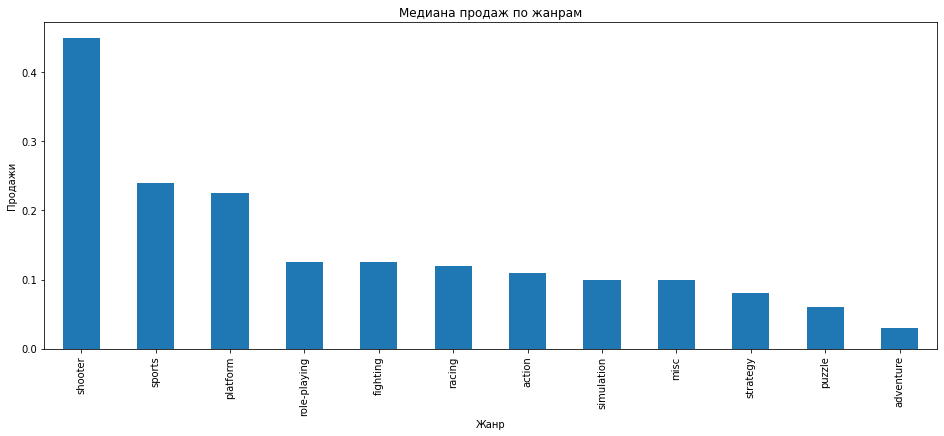

In [ ]:
data_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', figsize=(16, 6))
plt.xlabel('Жанр')
plt.ylabel('Продажи')
_ = plt.title('Медиана продаж по жанрам');

Анализ продаж игр по жанрам показывает, что наибольший доход приносят шутеры (стрелялки), которые имеют самые высокие медианные продажи. На втором месте расположены платформеры, также демонстрирующие значительный доход. Спортивные игры занимают третью позицию, оставаясь популярными среди игроков. Файтинги занимают четвертое место. Такое распределение популярности отражает предпочтения игроков.

Игры жанров стратегии, головоломки и приключения менее популярны среди пользователей, но у них есть своя нишевая аудитория.

# Портрет пользователя каждого региона

Выясняем в каком регионе какая платформа наиболее популярна.

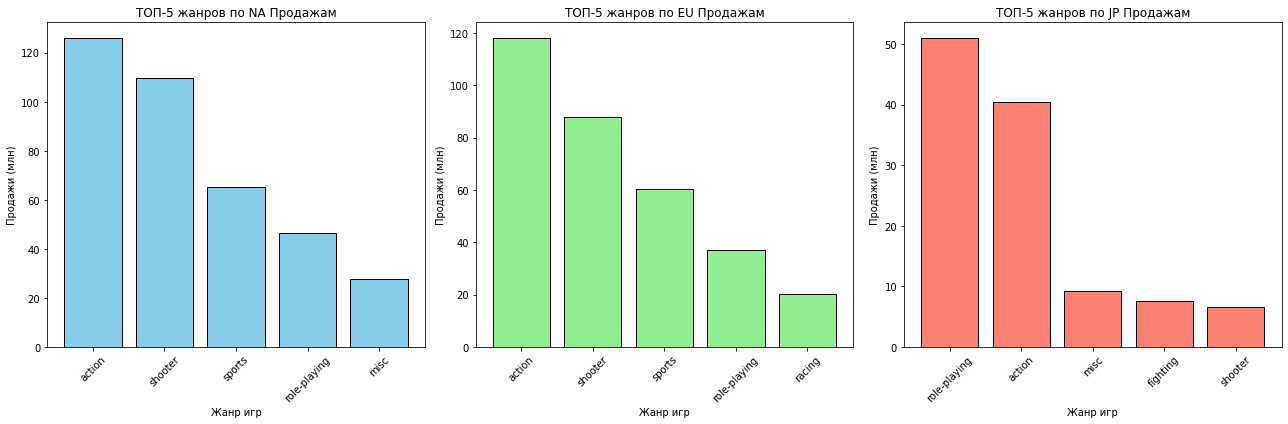

In [ ]:
na_genres_top5 = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()
eu_genres_top5 = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()
jp_genres_top5 = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)

plt.bar(na_genres_top5['genre'], na_genres_top5['na_sales'], color='skyblue', edgecolor='black')
plt.title('ТОП-5 жанров по NA Продажам')
plt.xlabel('Жанр игр')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(eu_genres_top5['genre'], eu_genres_top5['eu_sales'], color='lightgreen', edgecolor='black')
plt.title('ТОП-5 жанров по EU Продажам')
plt.xlabel('Жанр игр')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(jp_genres_top5['genre'], jp_genres_top5['jp_sales'], color='salmon', edgecolor='black')
plt.title('ТОП-5 жанров по JP Продажам')
plt.xlabel('Жанр игр')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

В Америке и Европе наибольшие продажи приходятся на жанры action и shooter, что указывает на популярность динамичных игр в этих регионах. Однако в Японии ситуация иная: здесь лидирует жанр role-playing, что подчеркивает предпочтение японской аудитории к сюжетным играм с элементами ролевого отыгрыша.

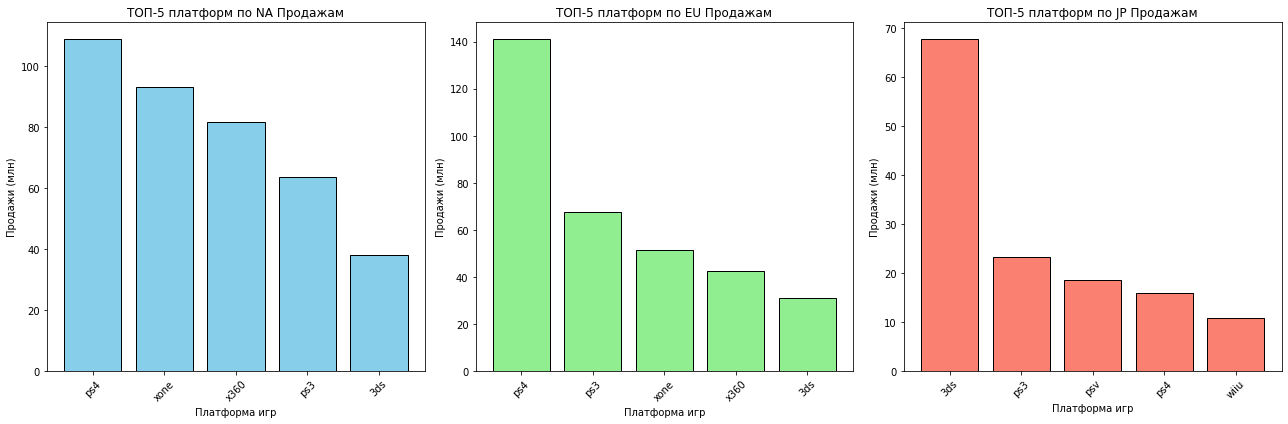

In [ ]:
na_platform_top5 = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()
eu_platform_top5 = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()
jp_platform_top5 = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)

plt.bar(na_platform_top5['platform'], na_platform_top5['na_sales'], color='skyblue', edgecolor='black')
plt.title('ТОП-5 платформ по NA Продажам')
plt.xlabel('Платформа игр')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(eu_platform_top5['platform'], eu_platform_top5['eu_sales'], color='lightgreen', edgecolor='black')
plt.title('ТОП-5 платформ по EU Продажам')
plt.xlabel('Платформа игр')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(jp_platform_top5['platform'], jp_platform_top5['jp_sales'], color='salmon', edgecolor='black')
plt.title('ТОП-5 платформ по JP Продажам')
plt.xlabel('Платформа игр')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Что касается платформ, PS4 и Xbox One доминируют по продажам в Северной Америке и Европе, что свидетельствует о высокой популярности консолей текущего поколения в этих регионах. В Японии же наибольшие продажи приходится на портативную консоль 3DS, что отражает значимость портативных устройств на японском игровом рынке. Важно отметить, что предпочтения по жанрам и платформам заметно отличаются между регионами, что подчеркивает важность регионального подхода в маркетинге игр.

**Изучаем данные по популярности жанров среди регионов.**

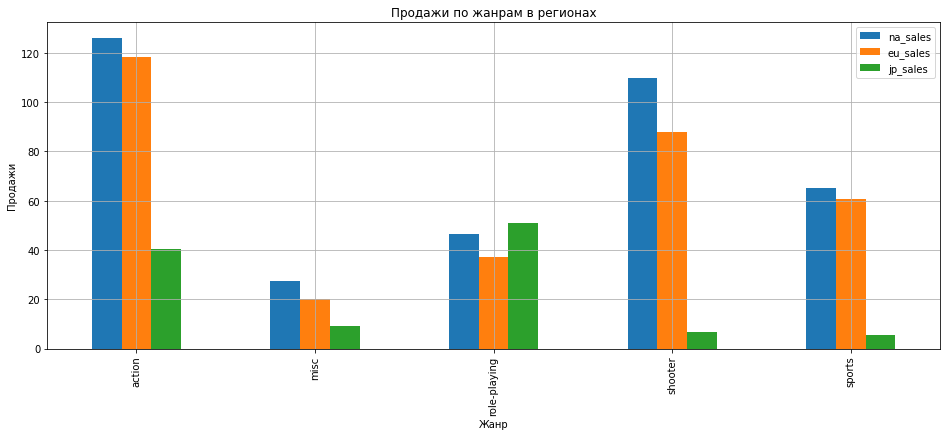

In [ ]:
top_5_genres = data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5).index

data_top_5_genres = data_actual[data_actual['genre'].isin(top_5_genres)]

data_top_5_genres.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar', figsize=(16, 6))
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Продажи по жанрам в регионах')
plt.grid(True)
plt.show()

В Америке и Европе экшн-игры являются самым популярным жанром, за ними следуют спортивные игры, шутеры, смешанный жанр и ролевые игры. В Японии же наибольшей популярностью пользуются ролевые игры, затем идут экшн-игры, смешанный жанр, спортивные игры и шутеры. Эти различия в предпочтениях жанров между регионами подчеркивают культурные и рыночные особенности каждого региона.

**Проверяем влияет ли возрастной рейтинг на продажи по регионам.**

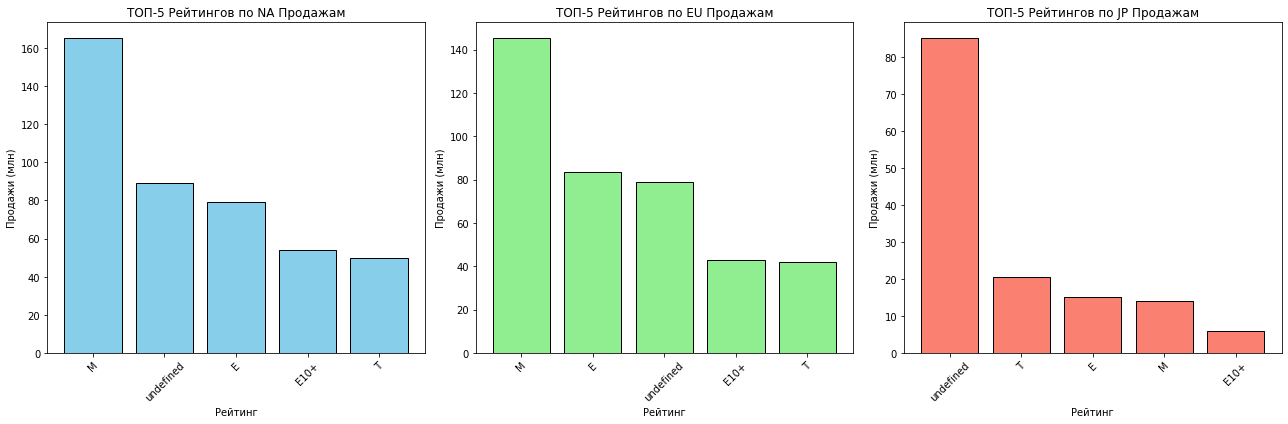

In [ ]:
na_sales_top5 = data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()
eu_sales_top5 = data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()
jp_sales_top5 = data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)

plt.bar(na_sales_top5['rating'], na_sales_top5['na_sales'], color='skyblue', edgecolor='black')
plt.title('ТОП-5 Рейтингов по NA Продажам')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(eu_sales_top5['rating'], eu_sales_top5['eu_sales'], color='lightgreen', edgecolor='black')
plt.title('ТОП-5 Рейтингов по EU Продажам')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(jp_sales_top5['rating'], jp_sales_top5['jp_sales'], color='salmon', edgecolor='black')
plt.title('ТОП-5 Рейтингов по JP Продажам')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
data_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59
undefined,89.42,78.91,85.05


В Северной Америке и Европе игры с рейтингом M доминируют по продажам, тогда как в Японии лидируют игры с неопределенным рейтингом. На втором месте по популярности в каждом регионе находятся игры с рейтингом E. На третьем месте в США и Японии находятся игры с рейтингом T, в то время как в Европе популярны игры с неопределенным рейтингом. Четвертое место варьируется по регионам: в США это рейтинг E10+, в Европе — рейтинг T, а в Японии — рейтинг M. На пятом месте находятся игры с неопределенным рейтингом в США и рейтингом E10+ в Европе и Японии.

# Проверка гипотез

**Гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза предполагает, что нет значимых различий между средними значениями двух групп. В данном контексте это означает, что средние пользовательские рейтинги для Xbox One и PC одинаковы. Мы начинаем с предположения о равенстве, и целью тестирования является проверка этого предположения. Оценки пользователей на платформе Xbox One являются независимыми от оценок на платформе PC. Мы сравниваем две отдельные группы, что соответствует критериям для применения t-теста для независимых выборок.

**Нулевая гипотеза (H0):** Средние пользовательские рейтинги платформ Xbox One и PC равны.
**Альтернативная гипотеза (H1):** Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [ ]:
xone = data_actual[data_actual['platform'] == 'xone']['user_score'].dropna()
pc = data_actual[data_actual['platform'] == 'pc']['user_score'].dropna()

t_stat, p_value = stats.ttest_ind(xone, pc, alternative='two-sided', equal_var=False)

print(f"Средний пользовательский рейтинг Xbox One: {xone.mean()}")
print(f"Средний пользовательский рейтинг PC: {pc.mean()}")
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо различаются.")
else:
    print("Нет оснований отвергать гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC: 6.2696774193548395
T-статистика: 1.45192815744488
P-значение: 0.14759594013430463
Нет оснований отвергать гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


**Вывод:** на основании имеющихся данных нельзя утверждать, что существует статистически значимое различие в средних пользовательских оценках между этими двумя платформами.

**Гипотеза:** Средние пользовательские рейтинги жанров Action Sports разные.

Для проверки гипотезы о различии средних пользовательских рейтингов жанров Action и Sports мы сформулировали следующие гипотезы: нулевая гипотеза (H0) утверждает, что средние пользовательские рейтинги жанров Action и Sports равны, альтернативная гипотеза (H1) предполагает, что эти средние рейтинги различаются. Для проверки этих гипотез был использован t-тест для независимых выборок, поскольку он подходит для сравнения средних значений двух независимых групп данных, и учитывает возможность различия дисперсий между группами, что важно для корректной интерпретации результатов.

**Нулевая гипотеза (H0)** : Средние пользовательские рейтинги для жанров Action и Sports равны.
**Альтернативная гипотеза (H1)** : Средние пользовательские рейтинги для жанров Action и Sports не равны.

In [ ]:
action = data_actual[data_actual['genre'] == 'action']['user_score'].dropna()
sports = data_actual[data_actual['genre'] == 'sports']['user_score'].dropna()

t_stat, p_value = stats.ttest_ind(action, sports, alternative='two-sided', equal_var=False)

print(f"Средний пользовательский рейтинг для жанра Action: {action.mean():.2f}")
print(f"Средний пользовательский рейтинг для жанра Sports: {sports.mean():.2f}")
print(f"T-статистика: {t_stat:.2f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.")
else:
    print("Нет оснований отвергать гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.")

Средний пользовательский рейтинг для жанра Action: 6.84
Средний пользовательский рейтинг для жанра Sports: 5.24
T-статистика: 10.23
P-значение: 0.0000
Средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.


**Вывод:** Проведенный статистический тест показал, что средние пользовательские рейтинги жанров Action и Sports значительно различаются. Средний рейтинг для игр жанра Action составил 6.84, тогда как для жанра Sports — 5.24. Высокое значение T-статистики (10.23) и крайне малое P-значение (0.0000) подтверждают, что различие в рейтингах является статистически значимым, что позволяет нам утверждать, что пользователи оценивают игры этих жанров по-разному.

# Общий вывод

## Предварительная обработка данных:

   - Приведены названия столбцов к нижнему регистру.
   - Обработаны пропуски: значения в столбцах `name` и `genre` заменены на `unknown`, в столбце `rating` — на `undefined`. Значения "tbd" в столбце `user_score` заменены на NaN.
   - Столбец `year_of_release` приведен к целочисленному формату.
   - Добавлен столбец с суммарными продажами по всем регионам.
   - Приведены данные в столбцах `name`, `genre`, и `platform` к нижнему регистру.
   - Удалены 5 неявных дубликатов из таблицы.

## Исследовательский анализ

**Анализ временных рядов**:
   - **Выводы по количеству выпусков игр по годам**:
     - Наблюдается рост числа игр с 1994 года, что связано с выходом новых консолей и бумом в индустрии.
     - После 2009 года наблюдается спад, что может быть связано с насыщением рынка и увеличением затрат на разработку.

**Анализ платформ**:
   - **График выручки по годам**:
     - ПК (PC) показывает долгосрочные продажи, но без резких пиков.
     - Платформы семейства PlayStation демонстрируют рост после спадов, что свидетельствует о жизненном цикле в 10 лет.
     - Wii имеет высокий уровень выручки, Xbox 360 и другие платформы также показывают характерные изменения.

**Актуальный период (2013-2016)**:
   - **Тенденции по продажам**:
     - Платформы PS4, Xbox One и 3DS являются наиболее перспективными на 2017 год.

**Медианные продажи по платформам**:
   - Наивысшие медианные продажи: Xbox 360, PS3.
   - Средние медианные продажи: PS4, WiiU, Wii.
   - Низкие медианные продажи: PSP, PSV, DS.
   
**Выбросы в данных по продажам**
   - Основные платформы с наиболее выраженными выбросами — PS3, X360, PS4, Wii и XOne, где выбросы связаны с играми, значительно превосходящими медианные значения по продажам.

**Влияние оценок на продажи**:
   - **Оценки критиков**: умеренная положительная связь с прибылью от продаж.
   - **Оценки пользователей**: слабая положительная связь или отсутствие значимой связи с прибылью.

**Анализ по жанрам**:
   - **Наибольший доход**: Шутеры, платформеры, спортивные игры.
   - **Менее популярные жанры**: Стратегии, головоломки, приключения.

**Региональные предпочтения по жанрам**:
   - **Северная Америка**: экшены, шутеры, спортивные.
   - **Европа**: экшены, шутеры, спортивные.
   - **Япония**: ролевые игры, экшены.
   
**Региональные предпочтения по платформам**:
   - **Северная Америка**: PS4, XONE, X360
   - **Европа**: PS4, PS3, XONE
   - **Япония**: 3DS, PS3, PSV

**Возрастные рейтинги**:
   - **Северная Америка и Европа**: Игры с рейтингом M доминируют по продажам.
   - **Япония**: Игры с неопределенным рейтингом имеют наибольшие продажи.

**Проверка гипотез**:
    - Гипотеза о равенстве средних пользовательских рейтингов Xbox One и PC не подтвердилась.
    - Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports подтвердилась.

## Прогноз на 2017 год

**Перспективные платформы**:
   - Платформы PS4, Xbox One и 3DS должны стать ключевыми для планирования рекламных кампаний и развития новых продуктов в 2017 году, учитывая их высокие и стабильные показатели продаж в актуальный период.

**Жанры**:
   - Шутеры, платформеры и спортивные игры остаются наиболее прибыльными жанрами и будут актуальны для продвижения.

**Региональные стратегии**:
   - В Северной Америке и Европе следует сосредоточиться на экшенах и шутерах.
   - В Японии важно акцентировать внимание на ролевых играх и эксклюзивных предложениях для 3DS.

**Возрастные рейтинги**:
   - Важно учитывать популярность игр с рейтингом M в Северной Америке и Европе и неопределённым рейтингом в Японии при планировании релизов.

**Оценки и отзывы**:
   - Рекомендации для улучшения качества игр и маркетинга: ориентироваться на инновационные и эксклюзивные предложения, а не только на отзывы критиков и пользователей.

Эти выводы помогут вам эффективно планировать стратегию для продвижения и разработки новых игр на 2017 год, учитывая текущее состояние рынка и предпочтения пользователей.